In [1]:
import sys
import numpy as np
import pickle
import os
import re
import pandas as pd
import math
import matplotlib.pyplot as plt
from pathlib import Path
from pickle import dump, load
from math import log,log2
sys.path.append('/home/scarlett/github/ipython_notebook')  
from Python.quickBeast import get_NS_p_values, get_BEASTIE_tsv,get_tsv_p_values, get_data, get_qb_ns_data
BEASTIE_path="/home/scarlett/github/BEASTIE"
sys.path.append(str(BEASTIE_path))
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t
from prettytable import PrettyTable
from statsmodels.stats.multitest import multipletests

## 1. read p-values from each method, multiple testing corrections <br>2. assess whether p-values accurate at the tail (empirical p-values vs t-pval)

#### checking the p-values from qb output

In [2]:

# def get_data(n_gene,n_hets,n_depth,alt,sigma=0.7):
#     NEG=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-1_s-{sigma}.pickle"
#     POS=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}.pickle"
#     ns_NEG,ns_POS,qb_NEG_name,qb_POS_name = get_filename(POS,NEG)
#     path_beastie = "/data2/stan/iBEASTIE4/sigma0.7/parametrized/ASE_0.05_error/output_pkl/"
#     path_qb=f"/data2/stan/quickBEAST/a8.789625_b8.789625/lambda0.04545/parametrized/ASE_0.05_error/"
#     NS_path="/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p"
#     # qb
#     qb_POS, qb_NEG = get_qb_output(qb_POS_name, qb_NEG_name, path_qb)
#     _,_,mode_qb_pos_p_st,mode_qb_neg_p_st = get_tsv_p_values(qb_POS_name, qb_NEG_name, path_qb)
#     # b
#     b_pos, b_neg = get_BEASTIE_tsv(NEG,POS,path_beastie)
#     b_pos_p, b_neg_p = get_BEASTIE_pval(b_neg,b_pos)
#     # ns
#     ns_POS_p, ns_NEG_p = get_NS_p_values(ns_POS, ns_NEG, NS_path)
#     return mode_qb_pos_p_st,mode_qb_neg_p_st, b_pos_p, b_neg_p,ns_POS_p, ns_NEG_p, qb_POS, qb_NEG, b_pos, b_neg

# def get_qb_ns_data(n_gene,n_hets,n_depth,alt,sigma=0.7):
#     NEG=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-1_s-{sigma}.pickle"
#     POS=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}.pickle"
#     ns_NEG,ns_POS,qb_NEG_name,qb_POS_name = get_filename(POS,NEG)
#     path_qb=f"/data2/stan/quickBEAST/a8.789625_b8.789625/lambda0.04545/parametrized/ASE_0.05_error/"
#     NS_path="/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p"
#     qb_POS, qb_NEG = get_qb_output(qb_POS_name, qb_NEG_name, path_qb)
#     _,_,mode_qb_pos_p_st,mode_qb_neg_p_st = get_tsv_p_values(qb_POS_name, qb_NEG_name, path_qb)
#     ns_POS_p, ns_NEG_p = get_NS_p_values(ns_POS, ns_NEG, NS_path)
#     return mode_qb_pos_p_st, mode_qb_neg_p_st, ns_POS_p, ns_NEG_p, qb_POS, qb_NEG

# def get_qb_output(qb_POS, qb_NEG, qb_path):
#     qb_pos_file=pd.read_csv(f"{qb_path}/{qb_POS}",delimiter="\t",header=0)
#     qb_neg_file=pd.read_csv(f"{qb_path}/{qb_NEG}",delimiter="\t",header=0)
#     return qb_pos_file,qb_neg_file

# def get_BEASTIE_pval(NEG,POS):
#     NEG_pval = NEG["st_p_value"].values
#     POS_pval = POS["st_p_value"].values
#     return POS_pval,NEG_pval

# def get_filename(b_POS,b_NEG):  
#     ns_NEG = re.sub(r'_s-\d+(\.\d+)?', '', b_NEG)
#     ns_POS = re.sub(r'_s-\d+(\.\d+)?', '', b_POS)
#     qb_NEG = re.sub(r'_s-\d+(\.\d+)?', '', b_NEG).replace('.pickle', '.txt')
#     qb_POS = re.sub(r'_s-\d+(\.\d+)?', '', b_POS).replace('.pickle', '.txt')
#     return ns_NEG,ns_POS,qb_NEG,qb_POS

# def qq_norm(data):
#     # Without fit=True: The sample quantiles are plotted against the theoretical quantiles of a standard normal distribution.
#     # With fit=True: The sample data's mean and standard deviation are used to standardize both the sample data and the theoretical quantiles of the standard normal distribution before plotting them against each other.
#     data_array = np.array(data)
#     sm.qqplot(data_array, line='45', fit=True)
#     plt.title('QQ plot against normal distribution')
#     plt.show()

# def qq_skewed_t(data):
#     # Convert data to numpy array
#     data_array = np.array(data)
#     # Fit data to a t-distribution to get the parameters
#     df, loc, scale = t.fit(data_array)
#     # Calculate the theoretical quantiles for the t-distribution
#     theoretical_quantiles = t.ppf(np.linspace(0, 1, len(data_array)), df, loc, scale)
    
#     # Sort data
#     sorted_data = np.sort(data_array)
#     # Get the min and max values across both datasets for the y=x line
#     min_val = min(min(sorted_data), min(theoretical_quantiles))
#     max_val = max(max(sorted_data), max(theoretical_quantiles))
#     # Plot
#     plt.plot(theoretical_quantiles,sorted_data, 'o')
#     plt.plot([min(sorted_data), max(sorted_data)],
#             [min(sorted_data), max(sorted_data)], 'r-')  # line of equality
#     plt.ylabel('Observed Data')
#     plt.xlabel('Theoretical Quantiles (t-distribution)')
#     plt.title('QQ plot against t-distribution')
#     plt.show()

def get_corrected_p(qb_POS_p,qb_NEG_p):
    # Apply FDR correction
    _, qb_POS_p_fdr, _, _ = multipletests(qb_POS_p, method='fdr_bh')
    _, qb_NEG_p_fdr, _, _ = multipletests(qb_NEG_p, method='fdr_bh')

    # Apply Bonferroni correction
    _, qb_POS_p_bonf, _, _ = multipletests(qb_POS_p, method='bonferroni')
    _, qb_NEG_p_bonf, _, _ = multipletests(qb_NEG_p, method='bonferroni')
    return qb_POS_p_fdr, qb_NEG_p_fdr, qb_POS_p_bonf, qb_NEG_p_bonf



### 1. get p-values from each methods

In [12]:
# n_gene=1000
# n_null=19207904
# n_hets=10
# n_depth=100
# alt=0.5
# sigma=0.7
# qb_pos_p, qb_neg_p,b_pos_p, b_neg_p,ns_pos_p, ns_neg_p, qb_POS, qb_NEG, b_pos, b_neg = get_data(n_gene,n_hets,n_depth,alt,sigma=0.7)
# qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf = get_corrected_p(qb_pos_p,qb_neg_p)
# b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf = get_corrected_p(b_pos_p,b_neg_p)
# ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf = get_corrected_p(ns_pos_p,ns_neg_p)

### calculate power/type1error using p-values

In [5]:
def Table_b_qb_NS_power(n_gene,n_hets,n_depth,alt):
    qb_pos_p, qb_neg_p,b_pos_p, b_neg_p,ns_pos_p, ns_neg_p, qb_POS, qb_NEG, b_pos, b_neg = get_data(n_gene,n_hets,n_depth,alt,sigma=0.7)
    qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf = get_corrected_p(qb_pos_p,qb_neg_p)
    b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf = get_corrected_p(b_pos_p,b_neg_p)
    ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf = get_corrected_p(ns_pos_p,ns_neg_p)
    table_power_type1error_pvalues(qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf,b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf,ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf)

def Calculate_FDR_TDR_pval(pos_p, neg_p, threshold=0.05):
        # FDR
    # Number of declared positives and false positives based on corrected p-values
    R = np.sum(pos_p < threshold)
    V = np.sum(neg_p < threshold)
    FDR = V / (V + R) if R > 0 else 0
        # TDR
    T = np.sum(np.array(pos_p) < threshold)  # Total true hypotheses
    S = np.sum(np.array(pos_p) < threshold)  # True hypotheses declared significant
    TDR = S / T if T > 0 else 0
    return format(TDR,'.10f'), format(FDR,'.10f')

def Calculate_power_type1error_pval(pos_p, neg_p, threshold=0.05):
        # type 1 error
    bonf_type1error = np.mean(np.array(neg_p) < threshold)
        # power
    bonf_power = np.mean(np.array(pos_p) < threshold)
    return format(bonf_power,'.10f'), format(bonf_type1error,'.10f')

def table_power_type1error_pvalues_ns(qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf,ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf,title,alpha=0.05):
    qb_fdrp_tdr, qb_fdrp_fdr = Calculate_FDR_TDR_pval(qb_pos_p_fdr, qb_neg_p_fdr)
    qb_bonfp_tdr, qb_bonfp_fdr = Calculate_FDR_TDR_pval(qb_pos_p_bonf, qb_neg_p_bonf)
    qb_fdrp_power, qb_fdrp_type1error = Calculate_power_type1error_pval(qb_pos_p_fdr, qb_neg_p_fdr,alpha)
    qb_bonfp_power, qb_bonfp_type1error = Calculate_power_type1error_pval(qb_pos_p_bonf, qb_neg_p_bonf,alpha)
    
    ns_fdrp_tdr, ns_fdrp_fdr = Calculate_FDR_TDR_pval(ns_pos_p_fdr, ns_neg_p_fdr)
    ns_bonfp_tdr, ns_bonfp_fdr = Calculate_FDR_TDR_pval(ns_pos_p_bonf, ns_neg_p_bonf)
    ns_fdrp_power, ns_fdrp_type1error = Calculate_power_type1error_pval(ns_pos_p_fdr, ns_neg_p_fdr,alpha)
    ns_bonfp_power, ns_bonfp_type1error = Calculate_power_type1error_pval(ns_pos_p_bonf, ns_neg_p_bonf,alpha)
    # Plotting the histograms
    print((f"power      = #corrected pvalues from ALT  < {alpha}"))
    print((f"type1error = #corrected pvalues from NULL < {alpha}"))
    print((f"FDR        = #corrected pvalues from NULL < {alpha} / (#corrected pvalues from NULL & ALT < {alpha})"))
    print((f"TDR        = #corrected pvalues from ALT < {alpha}  / #corrected pvalues from ALT"))

    Table = PrettyTable([title, "(bonferroni) power","(bonferroni) type1error","(bonferroni) TDR","(bonferroni) FDR"])
    Table.add_row(["qb mode",qb_bonfp_power, qb_bonfp_type1error, qb_bonfp_tdr, qb_bonfp_fdr])
    Table.add_row(["NS",ns_bonfp_power, ns_bonfp_type1error, ns_bonfp_tdr, ns_bonfp_fdr])
    print(Table)

    Table = PrettyTable([title, "(FDR) power","(FDR) type1error","(FDR) TDR","(FDR) FDR"])
    Table.add_row(["qb mode",qb_fdrp_power, qb_fdrp_type1error, qb_fdrp_tdr, qb_fdrp_fdr])
    Table.add_row(["NS",ns_fdrp_power, ns_fdrp_type1error, ns_fdrp_tdr, ns_fdrp_fdr])
    print(Table)

def table_power_type1error_pvalues_b(b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf,qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf,ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf,title,alpha=0.05):
    b_fdrp_tdr, b_fdrp_fdr = Calculate_FDR_TDR_pval(b_pos_p_fdr, b_neg_p_fdr)
    b_bonfp_tdr, b_bonfp_fdr = Calculate_FDR_TDR_pval(b_pos_p_bonf, b_neg_p_bonf)
    b_fdrp_power, b_fdrp_type1error = Calculate_power_type1error_pval(b_pos_p_fdr, b_neg_p_fdr)
    b_bonfp_power, b_bonfp_type1error = Calculate_power_type1error_pval(b_pos_p_bonf, b_neg_p_bonf)

    qb_fdrp_tdr, qb_fdrp_fdr = Calculate_FDR_TDR_pval(qb_pos_p_fdr, qb_neg_p_fdr)
    qb_bonfp_tdr, qb_bonfp_fdr = Calculate_FDR_TDR_pval(qb_pos_p_bonf, qb_neg_p_bonf)
    qb_fdrp_power, qb_fdrp_type1error = Calculate_power_type1error_pval(qb_pos_p_fdr, qb_neg_p_fdr)
    qb_bonfp_power, qb_bonfp_type1error = Calculate_power_type1error_pval(qb_pos_p_bonf, qb_neg_p_bonf)
    
    ns_fdrp_tdr, ns_fdrp_fdr = Calculate_FDR_TDR_pval(ns_pos_p_fdr, ns_neg_p_fdr)
    ns_bonfp_tdr, ns_bonfp_fdr = Calculate_FDR_TDR_pval(ns_pos_p_bonf, ns_neg_p_bonf)
    ns_fdrp_power, ns_fdrp_type1error = Calculate_power_type1error_pval(ns_pos_p_fdr, ns_neg_p_fdr)
    ns_bonfp_power, ns_bonfp_type1error = Calculate_power_type1error_pval(ns_pos_p_bonf, ns_neg_p_bonf)
    # Plotting the histograms
    print((f"power      = #corrected pvalues from ALT  < {alpha}"))
    print((f"type1error = #corrected pvalues from NULL < {alpha}"))
    print((f"FDR        = #corrected pvalues from NULL < {alpha} / (#corrected pvalues from NULL & ALT < {alpha})"))
    print((f"TDR        = #corrected pvalues from ALT < {alpha}  / #corrected pvalues from ALT"))

    Table = PrettyTable([title, "(bonferroni) power","(bonferroni) type1error","(bonferroni) TDR","(bonferroni) FDR"])
    Table.add_row(["beastie",b_bonfp_power, b_bonfp_type1error, b_bonfp_tdr, b_bonfp_fdr])
    Table.add_row(["qb mode",qb_bonfp_power, qb_bonfp_type1error, qb_bonfp_tdr, qb_bonfp_fdr])
    Table.add_row(["NS",ns_bonfp_power, ns_bonfp_type1error, ns_bonfp_tdr, ns_bonfp_fdr])
    print(Table)

    Table = PrettyTable([title, "(FDR) power","(FDR) type1error","(FDR) TDR","(FDR) FDR"])
    Table.add_row(["beastie",b_fdrp_power, b_fdrp_type1error, b_fdrp_tdr, b_fdrp_fdr])
    Table.add_row(["qb mode",qb_fdrp_power, qb_fdrp_type1error, qb_fdrp_tdr, qb_fdrp_fdr])
    Table.add_row(["NS",ns_fdrp_power, ns_fdrp_type1error, ns_fdrp_tdr, ns_fdrp_fdr])
    print(Table)


def table_power_type1error_pvalues(qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf,ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf,ms_pos_p_fdr, ms_neg_p_fdr, ms_pos_p_bonf, ms_neg_p_bonf,pseudo_pos_p_fdr, pseudo_neg_p_fdr, pseudo_pos_p_bonf, pseudo_neg_p_bonf,title,alpha=0.05):
    qb_fdrp_tdr, qb_fdrp_fdr = Calculate_FDR_TDR_pval(qb_pos_p_fdr, qb_neg_p_fdr)
    qb_bonfp_tdr, qb_bonfp_fdr = Calculate_FDR_TDR_pval(qb_pos_p_bonf, qb_neg_p_bonf)
    qb_fdrp_power, qb_fdrp_type1error = Calculate_power_type1error_pval(qb_pos_p_fdr, qb_neg_p_fdr,alpha)
    qb_bonfp_power, qb_bonfp_type1error = Calculate_power_type1error_pval(qb_pos_p_bonf, qb_neg_p_bonf,alpha)
    
    ns_fdrp_tdr, ns_fdrp_fdr = Calculate_FDR_TDR_pval(ns_pos_p_fdr, ns_neg_p_fdr)
    ns_bonfp_tdr, ns_bonfp_fdr = Calculate_FDR_TDR_pval(ns_pos_p_bonf, ns_neg_p_bonf)
    ns_fdrp_power, ns_fdrp_type1error = Calculate_power_type1error_pval(ns_pos_p_fdr, ns_neg_p_fdr,alpha)
    ns_bonfp_power, ns_bonfp_type1error = Calculate_power_type1error_pval(ns_pos_p_bonf, ns_neg_p_bonf,alpha)

    ms_fdrp_tdr, ms_fdrp_fdr = Calculate_FDR_TDR_pval(ms_pos_p_fdr, ms_neg_p_fdr)
    ms_bonfp_tdr, ms_bonfp_fdr = Calculate_FDR_TDR_pval(ms_pos_p_bonf, ms_neg_p_bonf)
    ms_fdrp_power, ms_fdrp_type1error = Calculate_power_type1error_pval(ms_pos_p_fdr, ms_neg_p_fdr,alpha)
    ms_bonfp_power, ms_bonfp_type1error = Calculate_power_type1error_pval(ms_pos_p_bonf, ms_neg_p_bonf,alpha)

    pseudo_fdrp_tdr, pseudo_fdrp_fdr = Calculate_FDR_TDR_pval(pseudo_pos_p_fdr, pseudo_neg_p_fdr)
    pseudo_bonfp_tdr, pseudo_bonfp_fdr = Calculate_FDR_TDR_pval(pseudo_pos_p_bonf, pseudo_neg_p_bonf)
    pseudo_fdrp_power, pseudo_fdrp_type1error = Calculate_power_type1error_pval(pseudo_pos_p_fdr, pseudo_neg_p_fdr,alpha)
    pseudo_bonfp_power, pseudo_bonfp_type1error = Calculate_power_type1error_pval(pseudo_pos_p_bonf, pseudo_neg_p_bonf,alpha)
    # Plotting the histograms
    print((f"power      = #corrected pvalues from ALT  < {alpha}"))
    print((f"type1error = #corrected pvalues from NULL < {alpha}"))
    print((f"FDR        = #corrected pvalues from NULL < {alpha} / (#corrected pvalues from NULL & ALT < {alpha})"))
    print((f"TDR        = #corrected pvalues from ALT < {alpha}  / #corrected pvalues from ALT"))

    Table = PrettyTable([title, "(bonferroni) power","(bonferroni) type1error","(bonferroni) TDR","(bonferroni) FDR"])
    Table.add_row(["qb mode",qb_bonfp_power, qb_bonfp_type1error, qb_bonfp_tdr, qb_bonfp_fdr])
    Table.add_row(["NS",ns_bonfp_power, ns_bonfp_type1error, ns_bonfp_tdr, ns_bonfp_fdr])
    Table.add_row(["MS",ms_bonfp_power, ms_bonfp_type1error, ms_bonfp_tdr, ms_bonfp_fdr])
    Table.add_row(["Pseudo Phasing",pseudo_bonfp_power, pseudo_bonfp_type1error, pseudo_bonfp_tdr, pseudo_bonfp_fdr])
    print(Table)

    Table = PrettyTable([title, "(FDR) power","(FDR) type1error","(FDR) TDR","(FDR) FDR"])
    Table.add_row(["qb mode",qb_fdrp_power, qb_fdrp_type1error, qb_fdrp_tdr, qb_fdrp_fdr])
    Table.add_row(["NS",ns_fdrp_power, ns_fdrp_type1error, ns_fdrp_tdr, ns_fdrp_fdr])
    Table.add_row(["MS",ms_fdrp_power, ms_fdrp_type1error, ms_fdrp_tdr, ms_fdrp_fdr])
    Table.add_row(["Pseudo Phasing",pseudo_fdrp_power, pseudo_fdrp_type1error, pseudo_fdrp_tdr, pseudo_fdrp_fdr])
    print(Table)

### using skewed t distribution

In [10]:
n_gene=19207904
n_hets=10
n_depth=100
alt=0.5
sigma=0.7
title=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}"
_,_,qb_pos_p,qb_neg_p, ns_pos_p,ns_neg_p,ms_pos_p, ms_neg_p, pseudo_pos_p, pseudo_neg_p, _,_ = get_qb_ns_data(n_gene,n_hets,n_depth,alt,sigma=0.7)

qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf = get_corrected_p(qb_pos_p,qb_neg_p)
#b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf = get_corrected_p(b_pos_p,b_neg_p)
ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf = get_corrected_p(ns_pos_p,ns_neg_p)
ms_pos_p_fdr, ms_neg_p_fdr, ms_pos_p_bonf, ms_neg_p_bonf = get_corrected_p(ms_pos_p,ms_neg_p)
pseudo_pos_p_fdr, pseudo_neg_p_fdr, pseudo_pos_p_bonf, pseudo_neg_p_bonf = get_corrected_p(pseudo_pos_p,pseudo_neg_p)

table_power_type1error_pvalues(qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf,ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf,ms_pos_p_fdr, ms_neg_p_fdr, ms_pos_p_bonf, ms_neg_p_bonf,pseudo_pos_p_fdr, pseudo_neg_p_fdr, pseudo_pos_p_bonf, pseudo_neg_p_bonf,title,alpha=0.05)

power      = #corrected pvalues from ALT  < 0.05
type1error = #corrected pvalues from NULL < 0.05
FDR        = #corrected pvalues from NULL < 0.05 / (#corrected pvalues from NULL & ALT < 0.05)
TDR        = #corrected pvalues from ALT < 0.05  / #corrected pvalues from ALT
+-----------------------------------+--------------------+-------------------------+------------------+------------------+
| g-19207904_h-10_d-100_t-0.5_s-0.7 | (bonferroni) power | (bonferroni) type1error | (bonferroni) TDR | (bonferroni) FDR |
+-----------------------------------+--------------------+-------------------------+------------------+------------------+
|              qb mode              |    0.9999415865    |       0.0000000521      |   1.0000000000   |   0.0000000521   |
|                 NS                |    0.7653310845    |       0.0000000000      |   1.0000000000   |   0.0000000000   |
|                 MS                |    0.0023853201    |       0.0000000000      |   1.0000000000   |   0.00000

In [11]:
n_gene=19207904
n_hets=3
n_depth=30
alt=0.5
sigma=0.7
title=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}"
_,_,qb_pos_p,qb_neg_p, ns_pos_p,ns_neg_p,ms_pos_p, ms_neg_p, pseudo_pos_p, pseudo_neg_p, _,_ = get_qb_ns_data(n_gene,n_hets,n_depth,alt,sigma=0.7)

qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf = get_corrected_p(qb_pos_p,qb_neg_p)
#b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf = get_corrected_p(b_pos_p,b_neg_p)
ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf = get_corrected_p(ns_pos_p,ns_neg_p)
ms_pos_p_fdr, ms_neg_p_fdr, ms_pos_p_bonf, ms_neg_p_bonf = get_corrected_p(ms_pos_p,ms_neg_p)
pseudo_pos_p_fdr, pseudo_neg_p_fdr, pseudo_pos_p_bonf, pseudo_neg_p_bonf = get_corrected_p(pseudo_pos_p,pseudo_neg_p)

table_power_type1error_pvalues(qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf,ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf,ms_pos_p_fdr, ms_neg_p_fdr, ms_pos_p_bonf, ms_neg_p_bonf,pseudo_pos_p_fdr, pseudo_neg_p_fdr, pseudo_pos_p_bonf, pseudo_neg_p_bonf,title,alpha=0.05)

power      = #corrected pvalues from ALT  < 0.05
type1error = #corrected pvalues from NULL < 0.05
FDR        = #corrected pvalues from NULL < 0.05 / (#corrected pvalues from NULL & ALT < 0.05)
TDR        = #corrected pvalues from ALT < 0.05  / #corrected pvalues from ALT
+---------------------------------+--------------------+-------------------------+------------------+------------------+
| g-19207904_h-3_d-30_t-0.5_s-0.7 | (bonferroni) power | (bonferroni) type1error | (bonferroni) TDR | (bonferroni) FDR |
+---------------------------------+--------------------+-------------------------+------------------+------------------+
|             qb mode             |    0.0003076858    |       0.0000000000      |   1.0000000000   |   0.0000000000   |
|                NS               |    0.0016124612    |       0.0000000000      |   1.0000000000   |   0.0000000000   |
|                MS               |    0.0000053624    |       0.0000000000      |   1.0000000000   |   0.0000000000   |
| 

In [9]:
n_gene=19207904
n_hets=1
n_depth=5
alt=0.5
sigma=0.7
title=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}"
qb_pos_p,qb_neg_p, ns_pos_p,ns_neg_p, _,_ = get_qb_ns_data(n_gene,n_hets,n_depth,alt,sigma=0.7)

qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf = get_corrected_p(qb_pos_p,qb_neg_p)
#b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf = get_corrected_p(b_pos_p,b_neg_p)
ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf = get_corrected_p(ns_pos_p,ns_neg_p)
table_power_type1error_pvalues(qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf,ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf,title,alpha=0.05)

power      = #corrected pvalues from ALT  < 0.05
type1error = #corrected pvalues from NULL < 0.05
FDR        = #corrected pvalues from NULL < 0.05 / (#corrected pvalues from NULL & ALT < 0.05)
TDR        = #corrected pvalues from ALT < 0.05  / #corrected pvalues from ALT
+--------------------------------+--------------------+-------------------------+------------------+------------------+
| g-19207904_h-1_d-5_t-0.5_s-0.7 | (bonferroni) power | (bonferroni) type1error | (bonferroni) TDR | (bonferroni) FDR |
+--------------------------------+--------------------+-------------------------+------------------+------------------+
|            qb mode             |    0.0000000000    |       0.0000000000      |   0.0000000000   |   0.0000000000   |
|               NS               |    0.0000000000    |       0.0000000000      |   0.0000000000   |   0.0000000000   |
+--------------------------------+--------------------+-------------------------+------------------+------------------+
+-------

### using st distribution

In [32]:
n_gene=1000
n_hets=1
n_depth=5
alt=0.5
sigma=0.7
title=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}"
#qb_pos_p,qb_neg_p, ns_pos_p,ns_neg_p, _,_ = get_qb_ns_data(n_gene,n_hets,n_depth,alt,sigma=0.7)
qb_pos_p, qb_neg_p, b_pos_p, b_neg_p, ns_pos_p, ns_neg_p,_,_, _,_ = get_data(n_gene,n_hets,n_depth,alt,sigma=0.7)

qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf = get_corrected_p(qb_pos_p,qb_neg_p)
b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf = get_corrected_p(b_pos_p,b_neg_p)
ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf = get_corrected_p(ns_pos_p,ns_neg_p)
table_power_type1error_pvalues_b(b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf,qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf,ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf,title,alpha=0.05)

power      = #corrected pvalues from ALT  < 0.05
type1error = #corrected pvalues from NULL < 0.05
FDR        = #corrected pvalues from NULL < 0.05 / (#corrected pvalues from NULL & ALT < 0.05)
TDR        = #corrected pvalues from ALT < 0.05  / #corrected pvalues from ALT
+----------------------------+--------------------+-------------------------+------------------+------------------+
| g-1000_h-1_d-5_t-0.5_s-0.7 | (bonferroni) power | (bonferroni) type1error | (bonferroni) TDR | (bonferroni) FDR |
+----------------------------+--------------------+-------------------------+------------------+------------------+
|          beastie           |    0.1250000000    |       0.0270000000      |   1.0000000000   |   0.1776315789   |
|             qb             |    0.0000000000    |       0.0000000000      |   0.0000000000   |   0.0000000000   |
|             NS             |    0.0000000000    |       0.0000000000      |   0.0000000000   |   0.0000000000   |
+----------------------------+--

In [33]:
n_gene=1000
n_hets=1
n_depth=5
alt=0.75
sigma=0.7
title=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}"
#qb_pos_p,qb_neg_p, ns_pos_p,ns_neg_p, _,_ = get_qb_ns_data(n_gene,n_hets,n_depth,alt,sigma=0.7)
qb_pos_p, qb_neg_p, b_pos_p, b_neg_p, ns_pos_p, ns_neg_p,_,_, _,_ = get_data(n_gene,n_hets,n_depth,alt,sigma=0.7)

qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf = get_corrected_p(qb_pos_p,qb_neg_p)
b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf = get_corrected_p(b_pos_p,b_neg_p)
ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf = get_corrected_p(ns_pos_p,ns_neg_p)
table_power_type1error_pvalues_b(b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf,qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf,ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf,title,alpha=0.05)

power      = #corrected pvalues from ALT  < 0.05
type1error = #corrected pvalues from NULL < 0.05
FDR        = #corrected pvalues from NULL < 0.05 / (#corrected pvalues from NULL & ALT < 0.05)
TDR        = #corrected pvalues from ALT < 0.05  / #corrected pvalues from ALT
+-----------------------------+--------------------+-------------------------+------------------+------------------+
| g-1000_h-1_d-5_t-0.75_s-0.7 | (bonferroni) power | (bonferroni) type1error | (bonferroni) TDR | (bonferroni) FDR |
+-----------------------------+--------------------+-------------------------+------------------+------------------+
|           beastie           |    0.0540000000    |       0.0270000000      |   1.0000000000   |   0.3333333333   |
|              qb             |    0.0000000000    |       0.0000000000      |   0.0000000000   |   0.0000000000   |
|              NS             |    0.0000000000    |       0.0000000000      |   0.0000000000   |   0.0000000000   |
+-------------------------

In [34]:
n_gene=1000
n_hets=3
n_depth=30
alt=0.5
sigma=0.7
title=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}"
#qb_pos_p,qb_neg_p, ns_pos_p,ns_neg_p, _,_ = get_qb_ns_data(n_gene,n_hets,n_depth,alt,sigma=0.7)
qb_pos_p, qb_neg_p,b_pos_p, b_neg_p,ns_pos_p, ns_neg_p, qb_POS, qb_NEG, _,_ = get_data(n_gene,n_hets,n_depth,alt,sigma=0.7)
qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf = get_corrected_p(qb_pos_p,qb_neg_p)
b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf = get_corrected_p(b_pos_p,b_neg_p)
ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf = get_corrected_p(ns_pos_p,ns_neg_p)
table_power_type1error_pvalues_b(b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf,qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf,ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf,title,alpha=0.05)

power      = #corrected pvalues from ALT  < 0.05
type1error = #corrected pvalues from NULL < 0.05
FDR        = #corrected pvalues from NULL < 0.05 / (#corrected pvalues from NULL & ALT < 0.05)
TDR        = #corrected pvalues from ALT < 0.05  / #corrected pvalues from ALT
+-----------------------------+--------------------+-------------------------+------------------+------------------+
| g-1000_h-3_d-30_t-0.5_s-0.7 | (bonferroni) power | (bonferroni) type1error | (bonferroni) TDR | (bonferroni) FDR |
+-----------------------------+--------------------+-------------------------+------------------+------------------+
|           beastie           |    0.2680000000    |       0.0000000000      |   1.0000000000   |   0.0000000000   |
|              qb             |    0.2790000000    |       0.0000000000      |   1.0000000000   |   0.0000000000   |
|              NS             |    0.1340000000    |       0.0000000000      |   1.0000000000   |   0.0000000000   |
+-------------------------

In [35]:
n_gene=1000
n_hets=3
n_depth=30
alt=0.75
sigma=0.7
title=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}"
#qb_pos_p,qb_neg_p, ns_pos_p,ns_neg_p, _,_ = get_qb_ns_data(n_gene,n_hets,n_depth,alt,sigma=0.7)
qb_pos_p, qb_neg_p,b_pos_p, b_neg_p,ns_pos_p, ns_neg_p,_,_, _,_ = get_data(n_gene,n_hets,n_depth,alt,sigma=0.7)
qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf = get_corrected_p(qb_pos_p,qb_neg_p)
b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf = get_corrected_p(b_pos_p,b_neg_p)
ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf = get_corrected_p(ns_pos_p,ns_neg_p)
table_power_type1error_pvalues_b(b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf,qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf,ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf,title,alpha=0.05)

power      = #corrected pvalues from ALT  < 0.05
type1error = #corrected pvalues from NULL < 0.05
FDR        = #corrected pvalues from NULL < 0.05 / (#corrected pvalues from NULL & ALT < 0.05)
TDR        = #corrected pvalues from ALT < 0.05  / #corrected pvalues from ALT
+------------------------------+--------------------+-------------------------+------------------+------------------+
| g-1000_h-3_d-30_t-0.75_s-0.7 | (bonferroni) power | (bonferroni) type1error | (bonferroni) TDR | (bonferroni) FDR |
+------------------------------+--------------------+-------------------------+------------------+------------------+
|           beastie            |    0.0140000000    |       0.0000000000      |   1.0000000000   |   0.0000000000   |
|              qb              |    0.0010000000    |       0.0000000000      |   1.0000000000   |   0.0000000000   |
|              NS              |    0.0020000000    |       0.0000000000      |   1.0000000000   |   0.0000000000   |
+-------------------

In [38]:
n_gene=1000
n_hets=10
n_depth=100
alt=0.5
sigma=0.7
title=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}"
#qb_pos_p,qb_neg_p, ns_pos_p,ns_neg_p, _,_ = get_qb_ns_data(n_gene,n_hets,n_depth,alt,sigma=0.7)
qb_pos_p, qb_neg_p,b_pos_p, b_neg_p,ns_pos_p, ns_neg_p,_,_, _,_ = get_data(n_gene,n_hets,n_depth,alt,sigma=0.7)
qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf = get_corrected_p(qb_pos_p,qb_neg_p)
b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf = get_corrected_p(b_pos_p,b_neg_p)
ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf = get_corrected_p(ns_pos_p,ns_neg_p)
table_power_type1error_pvalues_b(b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf,qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf,ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf,title,alpha=0.05)

power      = #corrected pvalues from ALT  < 0.05
type1error = #corrected pvalues from NULL < 0.05
FDR        = #corrected pvalues from NULL < 0.05 / (#corrected pvalues from NULL & ALT < 0.05)
TDR        = #corrected pvalues from ALT < 0.05  / #corrected pvalues from ALT
+-------------------------------+--------------------+-------------------------+------------------+------------------+
| g-1000_h-10_d-100_t-0.5_s-0.7 | (bonferroni) power | (bonferroni) type1error | (bonferroni) TDR | (bonferroni) FDR |
+-------------------------------+--------------------+-------------------------+------------------+------------------+
|            beastie            |    1.0000000000    |       0.0020000000      |   1.0000000000   |   0.0019960080   |
|               qb              |    1.0000000000    |       0.0000000000      |   1.0000000000   |   0.0000000000   |
|               NS              |    0.8520000000    |       0.0000000000      |   1.0000000000   |   0.0000000000   |
+-------------

In [37]:
n_gene=1000
n_hets=10
n_depth=100
alt=0.75
sigma=0.7
title=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}"
#qb_pos_p,qb_neg_p, ns_pos_p,ns_neg_p, _,_ = get_qb_ns_data(n_gene,n_hets,n_depth,alt,sigma=0.7)
qb_pos_p, qb_neg_p,b_pos_p, b_neg_p,ns_pos_p, ns_neg_p,_,_, _,_ = get_data(n_gene,n_hets,n_depth,alt,sigma=0.7)
qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf = get_corrected_p(qb_pos_p,qb_neg_p)
b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf = get_corrected_p(b_pos_p,b_neg_p)
ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf = get_corrected_p(ns_pos_p,ns_neg_p)
table_power_type1error_pvalues_b(b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf,qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf,ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf,title,alpha=0.05)

power      = #corrected pvalues from ALT  < 0.05
type1error = #corrected pvalues from NULL < 0.05
FDR        = #corrected pvalues from NULL < 0.05 / (#corrected pvalues from NULL & ALT < 0.05)
TDR        = #corrected pvalues from ALT < 0.05  / #corrected pvalues from ALT
+--------------------------------+--------------------+-------------------------+------------------+------------------+
| g-1000_h-10_d-100_t-0.75_s-0.7 | (bonferroni) power | (bonferroni) type1error | (bonferroni) TDR | (bonferroni) FDR |
+--------------------------------+--------------------+-------------------------+------------------+------------------+
|            beastie             |    0.7540000000    |       0.0020000000      |   1.0000000000   |   0.0026455026   |
|               qb               |    0.4840000000    |       0.0000000000      |   1.0000000000   |   0.0000000000   |
|               NS               |    0.4520000000    |       0.0000000000      |   1.0000000000   |   0.0000000000   |
+-------

In [15]:
def table_power_type1error_pvalues(qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf,b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf,ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf,title,alpha=0.05):
    qb_power, qb_type1error, qb_tdr, qb_fdr = Calculate_power_type1error_pval(qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf)
    b_power, b_type1error, b_tdr, b_fdr = Calculate_power_type1error_pval(b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf)
    ns_power, ns_type1error, ns_tdr, ns_fdr = Calculate_power_type1error_pval(ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf)
    # Plotting the histograms
    print((f"bonferroni power      = #bonferroni corrected pvalues from ALT  < {alpha}"))
    print((f"bonferroni type1error = #bonferroni corrected pvalues from NULL < {alpha}"))
    print((f"FDR FDR               = #FDR corrected pvalues from NULL < {alpha} / (#FDR corrected pvalues from NULL & ALT < {alpha})"))
    print((f"FDR TDR               = #FDR corrected pvalues from ALT < {alpha}  / #FDR corrected pvalues from ALT"))

    Table = PrettyTable([title, "(bonferroni power)","(bonferroni) type1error","(FDR) TDR","(FDR) FDR"])
    Table.add_row(["qb mode",qb_power, qb_type1error, qb_tdr, qb_fdr])
    Table.add_row(["BEASTIE",b_power, b_type1error, b_tdr, b_fdr])
    Table.add_row(["NS",ns_power, ns_type1error, ns_tdr, ns_fdr])
    print(Table)

In [15]:
n_gene=1000
n_hets=3
n_depth=30
alt=0.5
sigma=0.7
title=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}"
qb_pos_p, qb_neg_p,b_pos_p, b_neg_p,ns_pos_p, ns_neg_p, qb_POS, qb_NEG, b_pos, b_neg = get_data(n_gene,n_hets,n_depth,alt,sigma=0.7)
qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf = get_corrected_p(qb_pos_p,qb_neg_p)
b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf = get_corrected_p(b_pos_p,b_neg_p)
ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf = get_corrected_p(ns_pos_p,ns_neg_p)
table_power_type1error_pvalues(qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf,b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf,ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf,title,alpha=0.05)

bonferroni power      = #bonferroni corrected pvalues from ALT  < 0.05
bonferroni type1error = #bonferroni corrected pvalues from NULL < 0.05
FDR FDR               = #FDR corrected pvalues from NULL < 0.05 / (#FDR corrected pvalues from NULL & ALT < 0.05)
FDR TDR               = #FDR corrected pvalues from ALT < 0.05  / #FDR corrected pvalues from ALT
+-----------------------------+--------------------+-------------------------+-----------+-----------+
| g-1000_h-3_d-30_t-0.5_s-0.7 | (bonferroni power) | (bonferroni) type1error | (FDR) TDR | (FDR) FDR |
+-----------------------------+--------------------+-------------------------+-----------+-----------+
|              qb             |      0.00200       |         0.00000         |  1.00000  |  0.00000  |
|           BEASTIE           |      0.00000       |         0.13700         |  0.00000  |  0.00000  |
|              NS             |      0.13400       |         0.00000         |  1.00000  |  0.00000  |
+---------------------------

In [ ]:
n_gene=1000
n_hets=10
n_depth=100
alt=0.5
sigma=0.7
title=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}"
qb_pos_p, qb_neg_p,b_pos_p, b_neg_p,ns_pos_p, ns_neg_p, qb_POS, qb_NEG, b_pos, b_neg = get_data(n_gene,n_hets,n_depth,alt,sigma=0.7)
qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf = get_corrected_p(qb_pos_p,qb_neg_p)
b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf = get_corrected_p(b_pos_p,b_neg_p)
ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf = get_corrected_p(ns_pos_p,ns_neg_p)
table_power_type1error_pvalues(qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf,b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf,ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf,title,alpha=0.05)

bonferroni power      = #bonferroni corrected pvalues from ALT  < 0.05
bonferroni type1error = #bonferroni corrected pvalues from NULL < 0.05
FDR FDR               = #FDR corrected pvalues from NULL < 0.05 / (#FDR corrected pvalues from NULL & ALT < 0.05)
FDR TDR               = #FDR corrected pvalues from ALT < 0.05  / #FDR corrected pvalues from ALT
+-------------------------------+--------------------+-------------------------+-----------+-----------+
| g-1000_h-10_d-100_t-0.5_s-0.7 | (bonferroni power) | (bonferroni) type1error | (FDR) TDR | (FDR) FDR |
+-------------------------------+--------------------+-------------------------+-----------+-----------+
|               qb              |      1.00000       |         0.00000         |  1.00000  |  0.00000  |
|            BEASTIE            |      0.00000       |         1.00000         |  0.00000  |  0.00000  |
|               NS              |      0.85200       |         0.00000         |  1.00000  |  0.00000  |
+---------------

In [ ]:
# def get_qb_pval(n_gene,n_hets,n_depth,alt,sigma=0.7):
#     NEG=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-1_s-{sigma}.pickle"
#     POS=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}.pickle"
#     _,_,qb_NEG,qb_POS = get_filename(POS,NEG)
#     path_qb=f"/data2/stan/quickBEAST/a8.789625_b8.789625/lambda0.04545/parametrized/ASE_0.05_error/"
#     qb_POS_p, qb_NEG_p,_,_ = get_qb_p_values(qb_POS,  qb_NEG, path_qb)
#     return qb_POS_p, qb_NEG_p

# def get_data(filename,path,parameter):
#     base_filename = os.path.splitext(filename)[0] # remove extension
#     parts = base_filename.split('_') # split by underscore
#     qb_filename = '_'.join(parts[:-1])
#     # read data
#     BEASTIE = read_one_pickle(path+"/"+filename)
#     qb=pd.read_csv(f"/data2/stan/quickBEAST/a{parameter}_b{parameter}/lambda0.04545/parametrized/ASE_0.05_error/{qb_filename}.txt",delimiter="\t",header=None)
#     qb.columns=['geneID','qb_posterior','qb_lambda','qb_mean','qb_var','qb_zscore','null_mean','null_std','null_df','null_loc','null_scale','normal_p_value','t_p_value']
#     qb['qb_lambda'] = pd.to_numeric(qb['qb_lambda'], errors='coerce')
#     qb['qb_posterior'] = pd.to_numeric(qb['qb_posterior'], errors='coerce')
#     qb['t_p_value'] = pd.to_numeric(qb['t_p_value'], errors='coerce')
#     qb['converted_qB_lambda_right'] = (0.5 + qb['qb_lambda']) / (1 - (0.5 + qb['qb_lambda']))
#     qb['converted_qB_lambda_left'] = (0.5 - qb['qb_lambda']) / (1 - (0.5 - qb['qb_lambda']))
#     qb['converted_qB_lambda'] = qb.apply(lambda row: max(row['converted_qB_lambda_left'], row['converted_qB_lambda_right']), axis=1)
#     return BEASTIE, qb


def Table_qb_NS_power(POS,NEG,qb_path,NS_path,MS_path,alpha_beta,type1error,lambdas = None):
    ns_NEG,ns_POS,qb_NEG,qb_POS = get_filename(POS,NEG)
    qb_POS_p, qb_NEG_p,_,_ = get_qb_p_values(qb_POS, qb_NEG, qb_path)
    ns_POS_p, ns_NEG_p = get_NS_p_values(ns_POS, ns_NEG, NS_path)
    ms_POS_p, ms_NEG_p = get_NS_p_values(ns_POS, ns_NEG, MS_path)
    #qb_power, qb_type1error = Calculate_bonferroni_power_type1error(qb_POS_p,qb_NEG_p,threshold=0.05)
    #ns_power, ns_type1error = Calculate_bonferroni_power_type1error(ns_POS_p,ns_NEG_p,threshold=0.05)
    fdr_qb_power, fdr_qb_type1error = Calculate_FDR_power_type1error(qb_POS_p,qb_NEG_p,threshold=0.05)
    fdr_ns_power, fdr_ns_type1error = Calculate_FDR_power_type1error(ns_POS_p,ns_NEG_p,threshold=0.05)
    fdr_ms_power, fdr_ms_type1error = Calculate_FDR_power_type1error(ms_POS_p,ms_NEG_p,threshold=0.05)
    # Plotting the histograms
    print((f"qB    FDR          power      = ALT (qB pval) <= 0.05"))
    print((f"qB    FDR          type1error = REF (qB pval) <= 0.05"))
    print((f"NS/MS FDR          power      = ALT (   pval) <= 0.05"))
    print((f"NS/MS FDR          type1error = REF (   pval) <= 0.05"))
    Table = PrettyTable(["sample Name", "qB (power)","NS (power)", "MS (power)","qb (type1er)","NS (type1er)","MS (type1er)"])
    Table.add_row([os.path.splitext(NEG)[0], fdr_qb_power,fdr_ns_power, fdr_ms_power,fdr_qb_type1error,fdr_ns_type1error,fdr_ms_type1error])
    print(Table)

In [ ]:
n_gene=1000
n_hets=10
n_depth=100
alt=1
sigma=0.7


_, corrected_fdr_NEG, _, _ = multipletests(qb_NEG_p, method='fdr_bh')
_, corrected_bonferroni_NEG, _, _ = multipletests(qb_NEG_p, method='bonferroni')

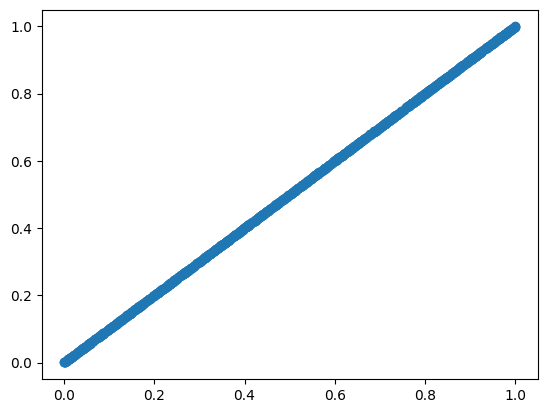

In [14]:
plt.scatter(qb_NEG_p,qb_NEG_p)

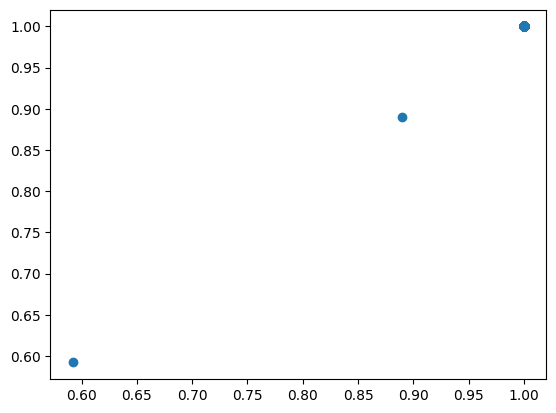

In [13]:
plt.scatter(corrected_bonferroni_NEG,corrected_bonferroni_NEG)

In [17]:
len([value for value in corrected_bonferroni_NEG if value < 0.05])

0

In [20]:
len([value for value in corrected_fdr_NEG if value < 0.05])

0

In [13]:
# Define a function to generate p-values, apply corrections, count, and plot
def analyze_p_values(n_gene, n_hets_high, n_depth_high, n_hets_low, n_depth_low, alt, sigma, cutoff):
    if alt!=1:
        type_label = "ALT"
    else:
        type_label = "NULL"

    # Generate p-values based on the parameters
    p_values_highcov,_, _,_, _,_ = get_qb_ns_data(n_gene,n_hets_high,n_depth_high,alt,sigma=0.7)
    p_values_lowcov,_, _,_, _,_ = get_qb_ns_data(n_gene,n_hets_low,n_depth_low,alt,sigma=0.7)
    highcov = p_values_highcov
    lowcov = p_values_lowcov 

    # Apply FDR correction
    _, corrected_high_fdr, _, _ = multipletests(highcov, method='fdr_bh')
    _, corrected_low_fdr, _, _ = multipletests(lowcov, method='fdr_bh')

    # Apply Bonferroni correction
    _, corrected_high_bonf, _, _ = multipletests(highcov, method='bonferroni')
    _, corrected_low_bonf, _, _ = multipletests(lowcov, method='bonferroni')

    # Count the number of values below the cutoff for each list
    counts = {
        f'High Coverage {type_label}': sum(p < cutoff for p in highcov),
        f'Low Coverage {type_label}': sum(p < cutoff for p in lowcov),
        'High Coverage FDR': sum(p < cutoff for p in corrected_high_fdr),
        'High Coverage Bonferroni': sum(p < cutoff for p in corrected_high_bonf),
        'Low Coverage FDR': sum(p < cutoff for p in corrected_low_fdr),
        'Low Coverage Bonferroni': sum(p < cutoff for p in corrected_low_bonf),
    }

    # Convert the counts to a pandas DataFrame for better display
    df_counts = pd.DataFrame(list(counts.items()), columns=[f"{type_label} Dataset", f'Count < {cutoff}'])
    df_counts[f'Percentage < {cutoff}'] = (df_counts[f'Count < {cutoff}'] / n_gene) * 100  # Assuming n_gene is the total count of p-values
    
# Plotting
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

    # Plot for uncorrected p-values KDE
    sns.kdeplot(highcov, label=f'High Coverage {type_label}', fill=True, ax=axes[0, 0])
    sns.kdeplot(lowcov, label=f'Low Coverage {type_label}', fill=True, ax=axes[0, 0])
    axes[0, 0].set_title(f'Density Plot of {type_label} Uncorrected P-Values')
    axes[0, 0].set_xlabel('P-Values')
    axes[0, 0].set_ylabel('Density')
    axes[0, 0].legend(loc='best')

    # Plot for corrected p-values KDE
    sns.kdeplot(corrected_high_fdr, label='High Coverage FDR', fill=True, ax=axes[0, 1])
    sns.kdeplot(corrected_low_fdr, label='Low Coverage FDR', fill=True, ax=axes[0, 1])
    sns.kdeplot(corrected_high_bonf, label='High Coverage Bonferroni', fill=True, ax=axes[0, 1])
    sns.kdeplot(corrected_low_bonf, label='Low Coverage Bonferroni', fill=True, ax=axes[0, 1])
    axes[0, 1].set_title('Density Plot of Corrected P-Values')
    axes[0, 1].set_xlabel('P-Values')
    axes[0, 1].set_ylabel('Density')
    axes[0, 1].legend(loc='best')


    # Histogram for uncorrected p-values
    axes[1, 0].hist(highcov, bins=30, alpha=0.5, label=f'High Coverage {type_label}')
    axes[1, 0].hist(lowcov, bins=30, alpha=0.5, label=f'Low Coverage {type_label}')
    axes[1, 0].set_title(f'Histogram of {type_label} Uncorrected P-Values')
    axes[1, 0].set_xlabel('P-Values')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].legend(loc='best')

    # Histogram for corrected p-values
    axes[1, 1].hist(corrected_high_fdr, bins=30, alpha=0.5, label='High Coverage FDR')
    axes[1, 1].hist(corrected_low_fdr, bins=30, alpha=0.5, label='Low Coverage FDR')
    axes[1, 1].hist(corrected_high_bonf, bins=30, alpha=0.5, label='High Coverage Bonferroni')
    axes[1, 1].hist(corrected_low_bonf, bins=30, alpha=0.5, label='Low Coverage Bonferroni')
    axes[1, 1].set_title('Histogram of Corrected P-Values')
    axes[1, 1].set_xlabel('P-Values')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].legend(loc='best')
    axes[1, 1].set_xlim(0,1.1)

    plt.tight_layout()
    plt.show()

    return df_counts


/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

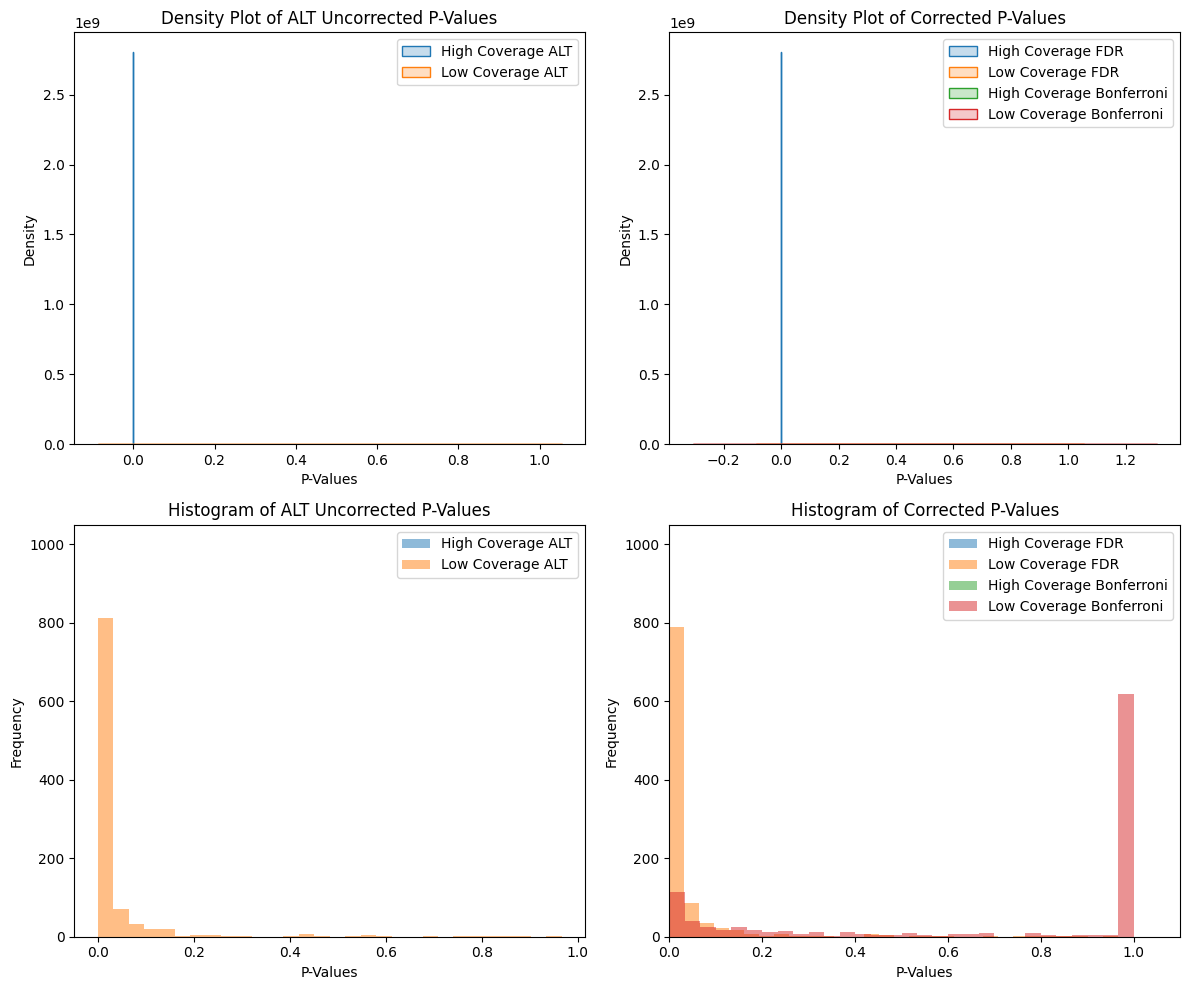

                ALT Dataset  Count < 0.05  Percentage < 0.05
0         High Coverage ALT          1000              100.0
1          Low Coverage ALT           861               86.1
2         High Coverage FDR          1000              100.0
3  High Coverage Bonferroni          1000              100.0
4          Low Coverage FDR           845               84.5
5   Low Coverage Bonferroni           131               13.1


In [14]:
# Usage example
df_counts = analyze_p_values(
    n_gene=1000,
    n_hets_high=10,
    n_depth_high=100,
    n_hets_low=3,
    n_depth_low=30,
    alt=0.5,
    sigma=0.7,
    cutoff=0.05
)

print(df_counts)

/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

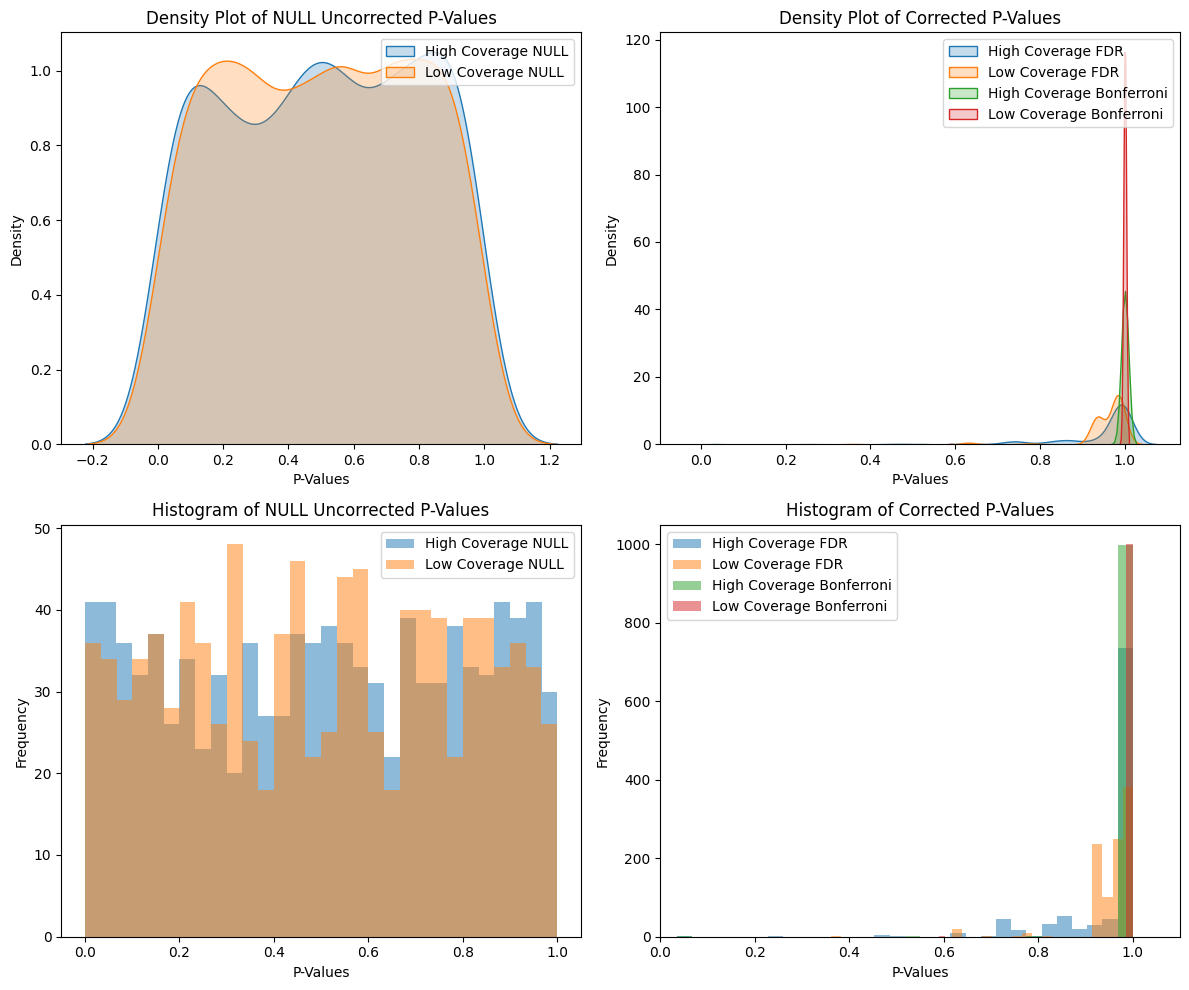

               NULL Dataset  Count < 0.05  Percentage < 0.05
0        High Coverage NULL            66                6.6
1         Low Coverage NULL            49                4.9
2         High Coverage FDR             1                0.1
3  High Coverage Bonferroni             1                0.1
4          Low Coverage FDR             0                0.0
5   Low Coverage Bonferroni             0                0.0


In [15]:
# Usage example
df_counts = analyze_p_values(
    n_gene=1000,
    n_hets_high=10,
    n_depth_high=100,
    n_hets_low=3,
    n_depth_low=30,
    alt=1,
    sigma=0.7,
    cutoff=0.05
)

print(df_counts)

/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

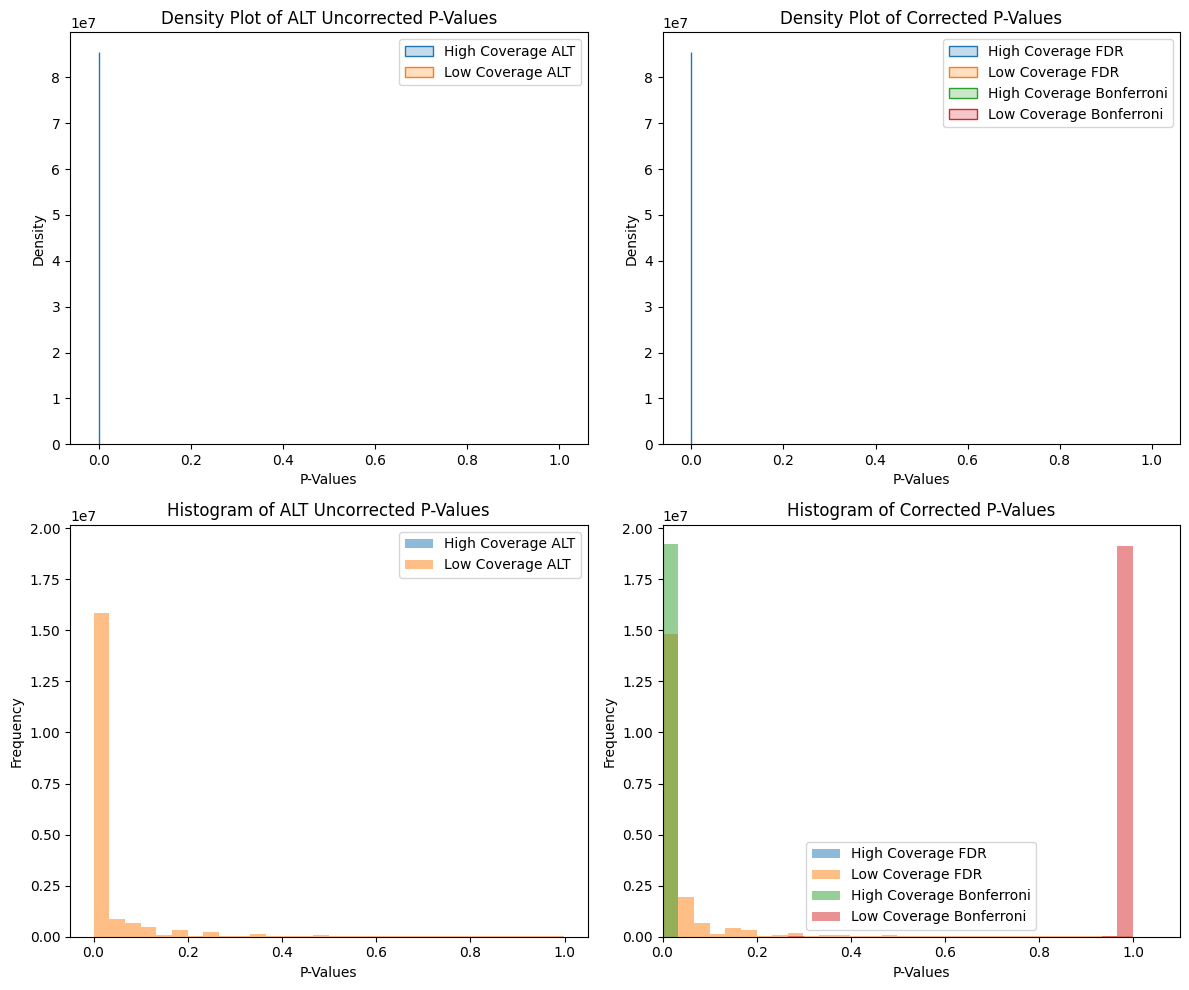

                ALT Dataset  Count < 0.05  Percentage < 0.05
0         High Coverage ALT      19207904         100.000000
1          Low Coverage ALT      15975402          83.170980
2         High Coverage FDR      19207904         100.000000
3  High Coverage Bonferroni      19206782          99.994159
4          Low Coverage FDR      15881307          82.681104
5   Low Coverage Bonferroni          5910           0.030769


In [16]:
# Usage example
df_counts = analyze_p_values(
    n_gene=19207904,
    n_hets_high=10,
    n_depth_high=100,
    n_hets_low=3,
    n_depth_low=30,
    alt=0.5,
    sigma=0.7,
    cutoff=0.05
)

print(df_counts)

/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

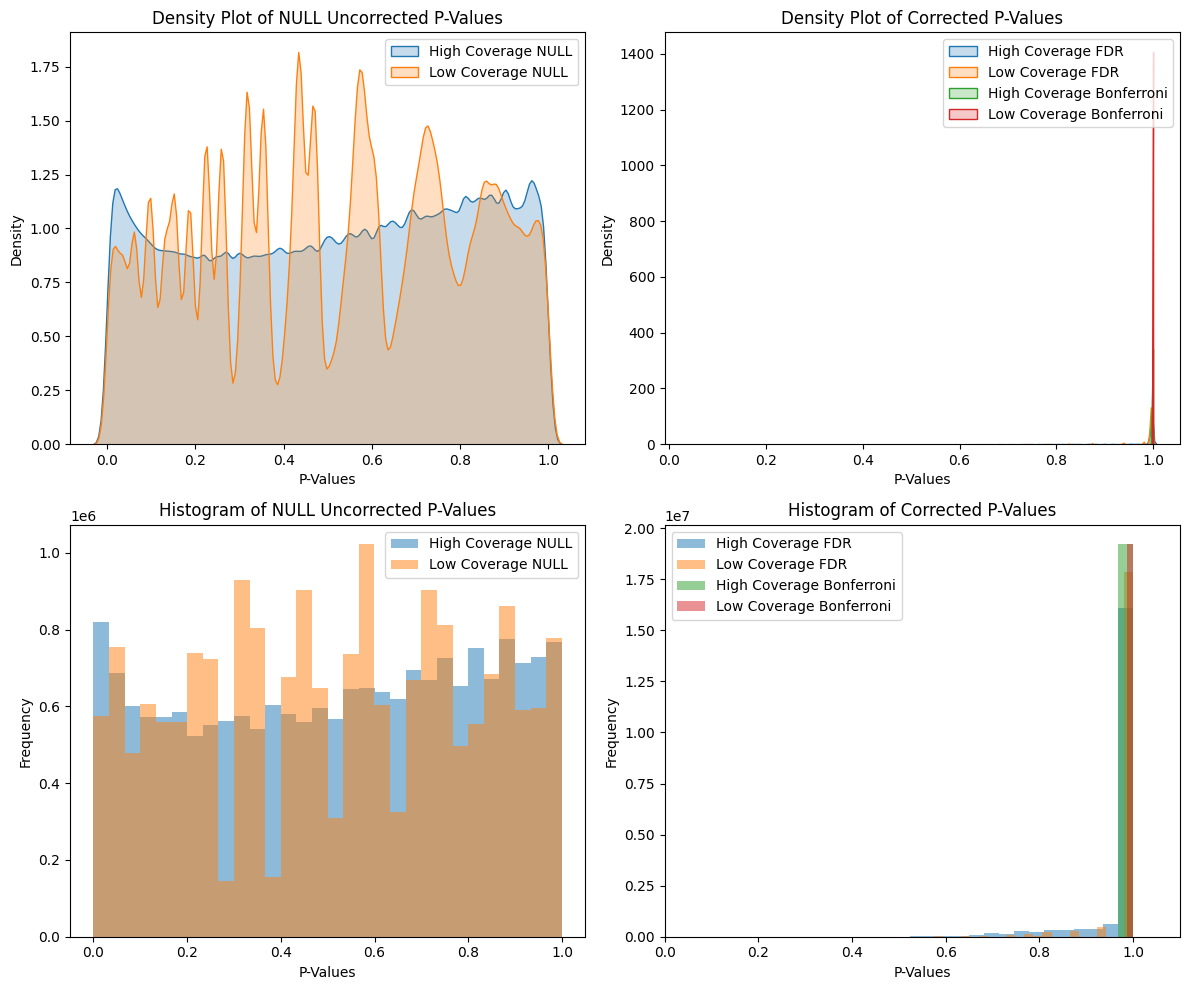

               NULL Dataset  Count < 0.05  Percentage < 0.05
0        High Coverage NULL       1163736           6.058631
1         Low Coverage NULL        878780           4.575096
2         High Coverage FDR             1           0.000005
3  High Coverage Bonferroni             1           0.000005
4          Low Coverage FDR             0           0.000000
5   Low Coverage Bonferroni             0           0.000000


In [17]:
# Usage example
df_counts = analyze_p_values(
    n_gene=19207904,
    n_hets_high=10,
    n_depth_high=100,
    n_hets_low=3,
    n_depth_low=30,
    alt=1,
    sigma=0.7,
    cutoff=0.05
)

print(df_counts)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_p_values(n_gene, n_hets_high, n_depth_high, n_hets_low, n_depth_low, alt, sigma, cutoff):
    if alt != 1:
        type_label = "ALT"
    else:
        type_label = "NULL"

    # Generate p-values based on the parameters
    p_values_highcov, _, _, _, _, _ = get_qb_ns_data(n_gene, n_hets_high, n_depth_high, alt, sigma=0.7)
    p_values_lowcov, _, _, _, _, _ = get_qb_ns_data(n_gene, n_hets_low, n_depth_low, alt, sigma=0.7)

    # Print summary statistics
    def print_summary(p_values, label):
        print(f"Summary for {label} coverage genes:")
        print("Mean p-value:", np.mean(p_values))
        print("Median p-value:", np.median(p_values))
        print("Standard deviation:", np.std(p_values))
        print("Number of unique p-values:", len(set(p_values)))

    print_summary(p_values_highcov, "high")
    print_summary(p_values_lowcov, "low")

    # Plotting the distributions of p-values in three separate subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

    # Plot for high coverage
    axes[0].hist(p_values_highcov, bins=30, alpha=0.75, color='blue')
    axes[0].set_title('High Coverage')
    axes[0].set_xlabel('P-value')
    axes[0].set_ylabel('Frequency')

    # Plot for low coverage
    axes[1].hist(p_values_lowcov, bins=30, alpha=0.75, color='green')
    axes[1].set_title('Low Coverage')
    axes[1].set_xlabel('P-value')
    axes[1].set_ylabel('Frequency')

    # Combined plot
    axes[2].hist(p_values_highcov, bins=30, alpha=0.5, label='High Coverage', color='blue')
    axes[2].hist(p_values_lowcov, bins=30, alpha=0.5, label='Low Coverage', color='green')
    axes[2].set_title('Combined P-value Distribution')
    axes[2].set_xlabel('P-value')
    axes[2].set_ylabel('Frequency')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

    return p_values_highcov, p_values_lowcov




In [5]:
high19,low19 = plot_p_values(
    n_gene=19207904,
    n_hets_high=10,
    n_depth_high=100,
    n_hets_low=3,
    n_depth_low=30,
    alt=1,
    sigma=0.7,
    cutoff=0.05
)

Summary for high coverage genes:
Mean p-value: 0.5182378938062104
Median p-value: 0.5357828784094999
Standard deviation: 0.296996985954579
Number of unique p-values: 10775
Summary for low coverage genes:
Mean p-value: 0.5146647459959518
Median p-value: 0.5356967065270264
Standard deviation: 0.2873453872596423
Number of unique p-values: 3191


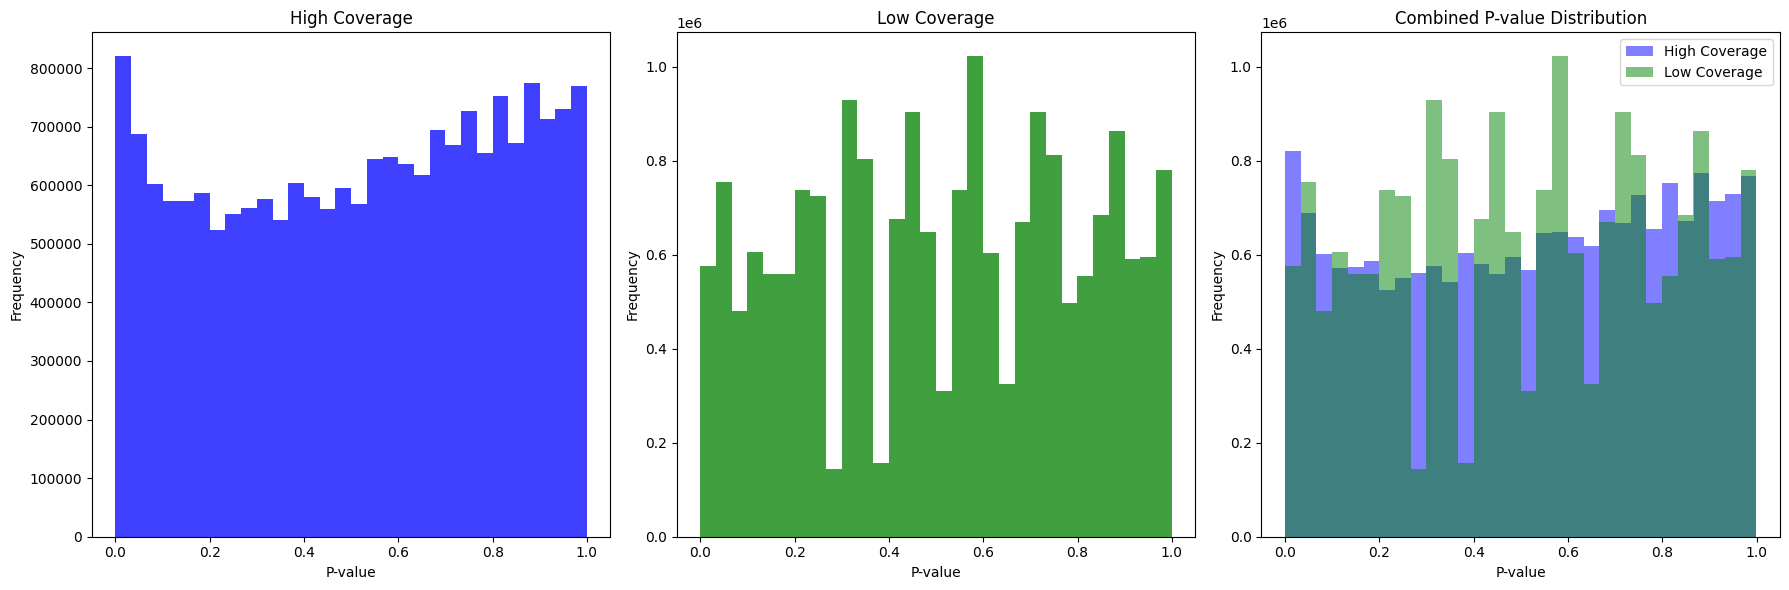

In [18]:
high19,low19 = plot_p_values(
    n_gene=19207904,
    n_hets_high=10,
    n_depth_high=100,
    n_hets_low=3,
    n_depth_low=30,
    alt=1,
    sigma=0.7,
    cutoff=0.05
)

Summary for high coverage genes:
Mean p-value: 2.162649308503383e-12
Median p-value: 1.4975973478900308e-19
Standard deviation: 1.4778880071517446e-09
Number of unique p-values: 3691
Summary for low coverage genes:
Mean p-value: 0.03840535186143252
Median p-value: 0.0029334022010252
Standard deviation: 0.11082599377435567
Number of unique p-values: 3661


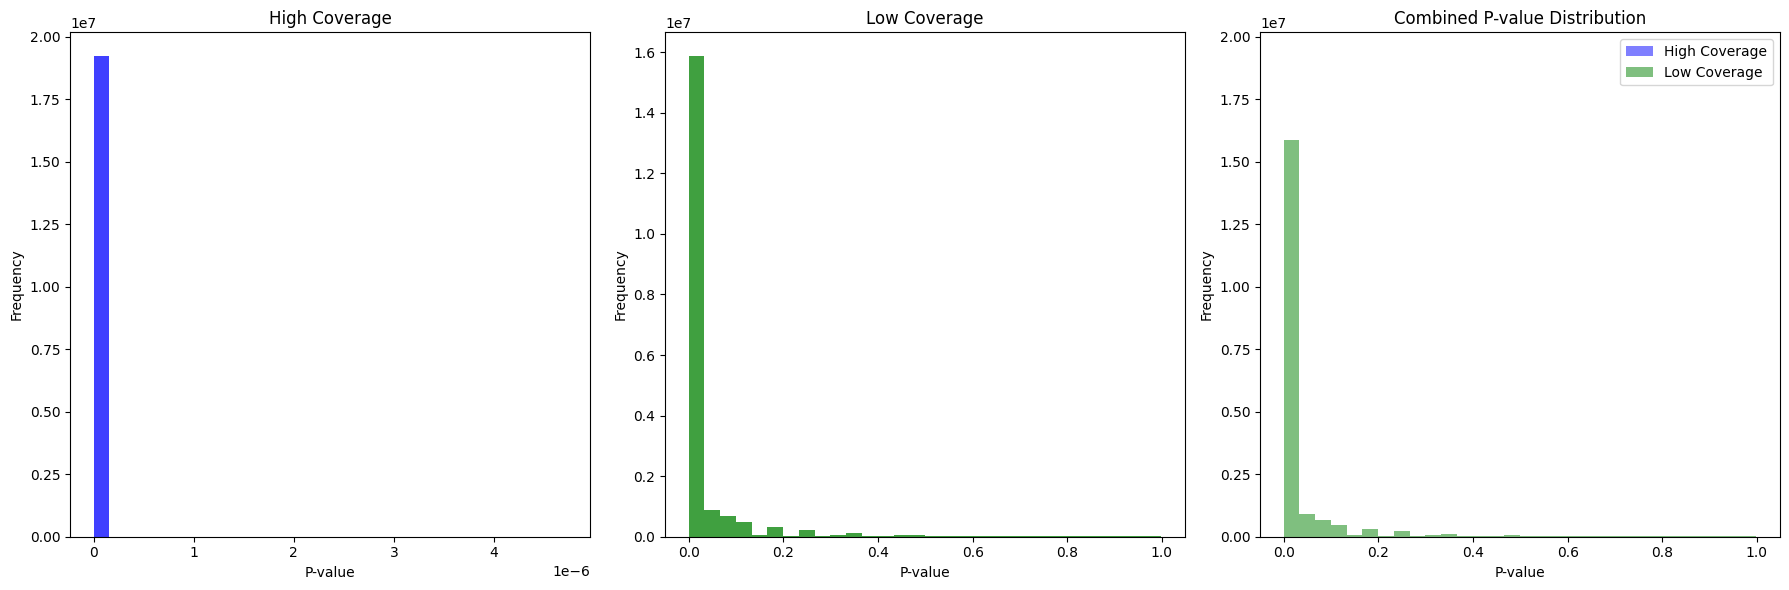

In [19]:
high19,low19 = plot_p_values(
    n_gene=19207904,
    n_hets_high=10,
    n_depth_high=100,
    n_hets_low=3,
    n_depth_low=30,
    alt=0.5,
    sigma=0.7,
    cutoff=0.05
)

Summary for high coverage genes:
Mean p-value: 0.5050592620101056
Median p-value: 0.5124103538236008
Standard deviation: 0.2969319321782564
Number of unique p-values: 990
Summary for low coverage genes:
Mean p-value: 0.4987219429355844
Median p-value: 0.5120818149577433
Standard deviation: 0.2884573300839677
Number of unique p-values: 990


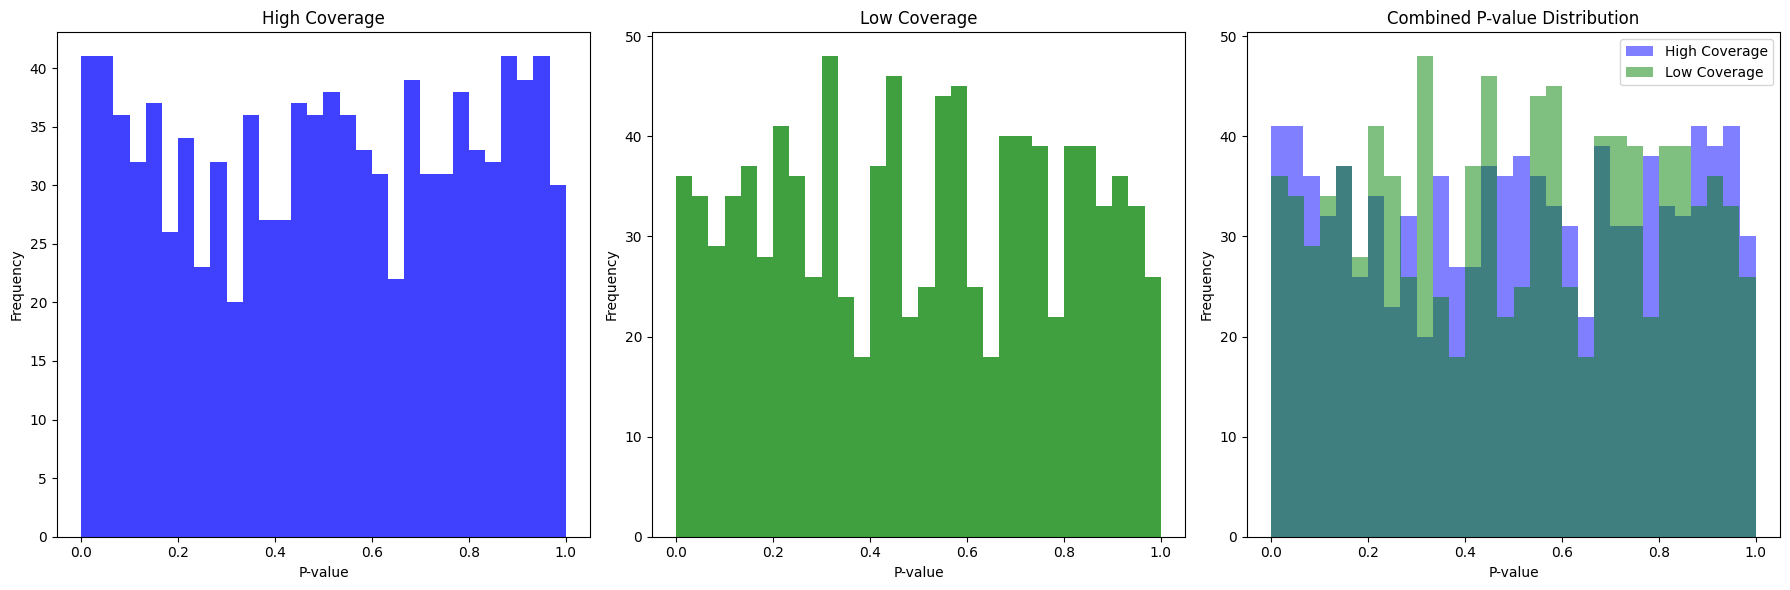

In [16]:
high,low=plot_p_values(
    n_gene=1000,
    n_hets_high=10,
    n_depth_high=100,
    n_hets_low=3,
    n_depth_low=30,
    alt=1,
    sigma=0.7,
    cutoff=0.05
)

Summary for high coverage genes:
Mean p-value: 1.7671674427605346e-11
Median p-value: 3.817089500682269e-19
Standard deviation: 5.379439248566423e-10
Number of unique p-values: 928
Summary for low coverage genes:
Mean p-value: 0.036810197137651324
Median p-value: 0.002448471026676
Standard deviation: 0.1162972011095709
Number of unique p-values: 909


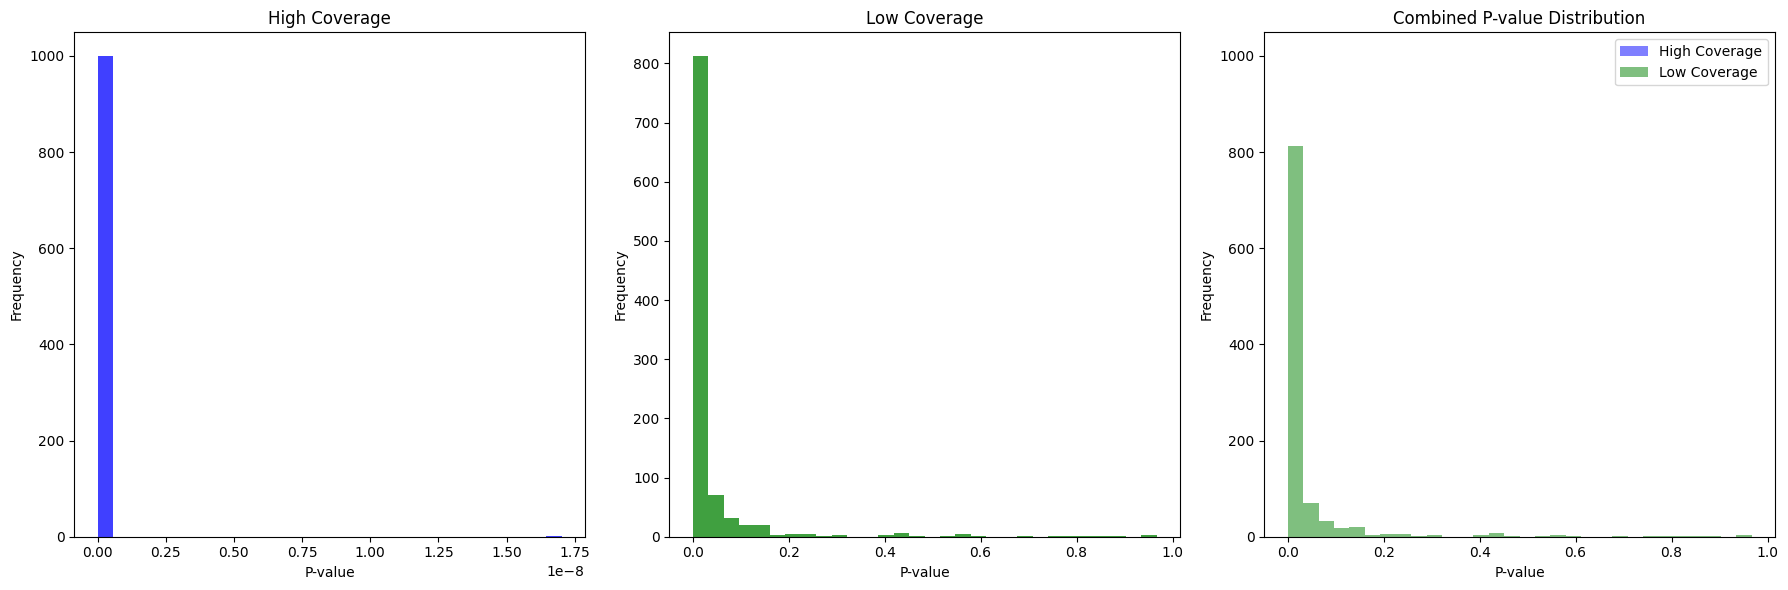

In [17]:
high,low=plot_p_values(
    n_gene=1000,
    n_hets_high=10,
    n_depth_high=100,
    n_hets_low=3,
    n_depth_low=30,
    alt=0.5,
    sigma=0.7,
    cutoff=0.05
)

In [4]:
import pandas as pd
def convert_pickle_to_rds(pickle_file, rds_file):
    data = pd.read_pickle(pickle_file)
    data.to_csv(rds_file) 

In [5]:
convert_pickle_to_rds("/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p/g-19207904_h-10_d-100_t-0.5.pickle", "/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p/g-19207904_h-10_d-100_t-0.5.rds")
convert_pickle_to_rds("/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p/g-19207904_h-10_d-100_t-1.pickle", "/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p/g-19207904_h-10_d-100_t-1.rds")
convert_pickle_to_rds("/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p/g-19207904_h-3_d-30_t-0.5.pickle", "/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p/g-19207904_h-3_d-30_t-0.5.rds")
convert_pickle_to_rds("/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p/g-19207904_h-3_d-30_t-1.pickle", "/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p/g-19207904_h-3_d-30_t-1.rds")

AttributeError: 'list' object has no attribute 'to_csv'

In [ ]:
convert_pickle_to_rds("/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p/g-19207904_h-10_d-100_t-0.5.pickle", "/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p/g-19207904_h-10_d-100_t-0.5.rds")
convert_pickle_to_rds("/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p/g-19207904_h-10_d-100_t-1.pickle", "/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p/g-19207904_h-10_d-100_t-1.rds")
convert_pickle_to_rds("/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p/g-19207904_h-3_d-30_t-0.5.pickle", "/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p/g-19207904_h-3_d-30_t-0.5.rds")
convert_pickle_to_rds("/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p/g-19207904_h-3_d-30_t-1.pickle", "/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p/g-19207904_h-3_d-30_t-1.rds")